#### Quantum square distance classifier.

In [509]:
from qiskit import *
import numpy as np

from qiskit.quantum_info import Statevector

data = np.array([0,0.921,0,0.39,0.141,0,0.99,0,0,0.866,0,0.5,0.866,0,0.5,0])
data_normlized = data/np.linalg.norm(data)

print(np.sum([i*i for i in data_normlized]))
print (data_normlized)

creg = ClassicalRegister(4)
qreg = QuantumRegister(4)
QC = QuantumCircuit(qreg,creg)
QC.initialize(data_normlized)
QC.barrier()
QC.h(-1)

0.9999999999999997
[0.         0.46048653 0.         0.1949943  0.07049794 0.
 0.49498552 0.         0.         0.43298734 0.         0.24999269
 0.43298734 0.         0.24999269 0.        ]


In [510]:
state = Statevector(QC)
state.draw(output="Latex")

<IPython.core.display.Latex object>

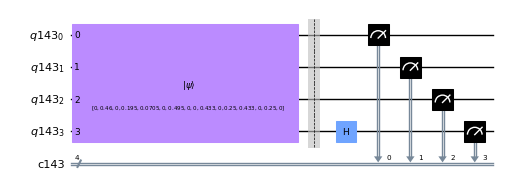

In [511]:
QC.measure(qreg,creg)
QC.draw(output="mpl", scale=0.5)


In [512]:
# from qiskit.primitives import Sampler 

# job = Sampler().run(QC, shots=1000)

# for k,v in (job.result().quasi_dists[0]).items():
#     print (bin(k)[2:], v)


In [513]:
from qiskit.primitives import Sampler
S = Sampler().run(QC, shots=5000)
print (S.result().quasi_dists[0])

prob_0 = 0
prob_1 = 0
for k,v in S.result().quasi_dists[0].items():
    if len(bin(k)[2:]) <= 3:
        prob_0 += v 
    else:
        prob_1 += v 

print (prob_0, prob_1)

{1: 0.403, 3: 0.0984, 4: 0.1308, 6: 0.272, 9: 0.0002, 11: 0.0004, 12: 0.0672, 14: 0.028}
0.9042000000000001 0.0958
